## Problem Statement: Conditional Variational Autoencoder (VAE) Implementation

### Objective:
Extend the basic Variational Autoencoder (VAE) implementation to a conditional VAE by incorporating a label input into both the encoder and decoder components.

### Background:
Variational Autoencoders (VAEs) are powerful generative models that learn to represent complex data distributions in a latent space. In a basic VAE, input data is encoded into a latent space, and a decoder reconstructs the original input from this latent representation. A conditional VAE introduces additional information, such as class labels, into this process, allowing for more controlled generation of data.

### Task Description:
You are required to modify the existing VAE implementation to accommodate conditional inputs. This involves augmenting both the encoder and decoder with label inputs, enabling the model to generate samples conditioned on specific labels.

### Requirements:
- Implement modifications to the VAE architecture to incorporate label inputs.
- Ensure compatibility with the chosen deep learning framework and programming language.
- Validate the performance of the conditional VAE through qualitative and quantitative evaluation, comparing it against the basic VAE.

### Deliverables:
1. Modified codebase containing the conditional VAE implementation.
2. Documentation detailing the changes made and instructions for usage.
3. Evaluation results demonstrating the effectiveness of the conditional VAE compared to the basic VAE.

### Evaluation Criteria:
- Correctness and completeness of the implementation.
- Clarity and organization of the documentation.
- Effectiveness of the conditional VAE in generating samples conditioned on labels.
- Comparison of performance metrics between the basic VAE and conditional VAE.

### Resources:
- Basic VAE implementation codebase.
- Dataset suitable for conditional VAE trainformation or considerations here.]


DATA SET USED
# 
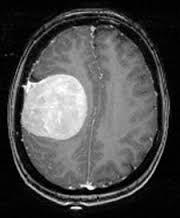 
# image with tumor 

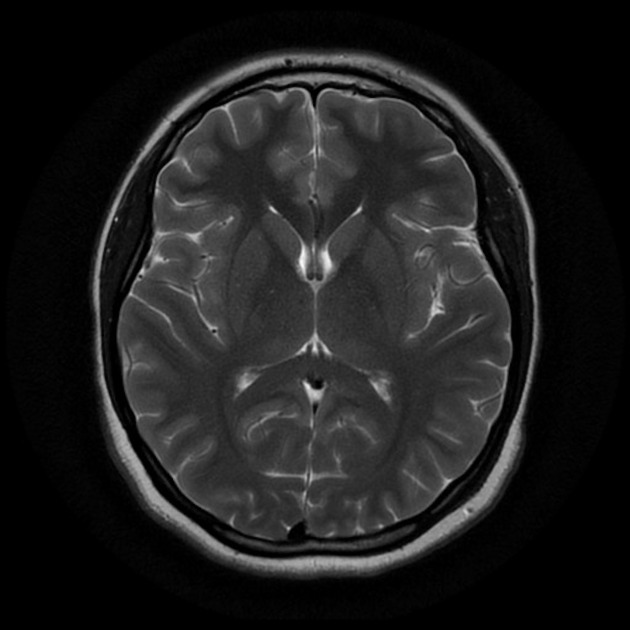 
# clear MRI

In [2]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Define parameters
image_size = 64
latent_dim = 100
num_classes = 2  # "yes" and "no"
epochs = 50
batch_size = 32
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define transforms
transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
])

# Load data
data_path = "data"
train_dataset = datasets.ImageFolder(root=data_path, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define encoder
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1)
        self.fc_mu = nn.Linear(64*16*16 + num_classes, latent_dim)
        self.fc_logvar = nn.Linear(64*16*16 + num_classes, latent_dim)

    def forward(self, x, labels):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = x.view(x.size(0), -1)
        x = torch.cat([x, labels], dim=1)
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

# Define decoder
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.fc = nn.Linear(latent_dim + num_classes, 64*16*16)
        self.conv1 = nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.ConvTranspose2d(32, 3, kernel_size=4, stride=2, padding=1)

    def forward(self, z, labels):
        z = torch.cat([z, labels], dim=1)
        x = self.fc(z)
        x = x.view(x.size(0), 64, 16, 16)
        x = torch.relu(self.conv1(x))
        x = torch.sigmoid(self.conv2(x))
        return x

# Define Conditional VAE
class CVAE(nn.Module):
    def __init__(self, encoder, decoder):
        super(CVAE, self).__init__()
        self.encoder = encoder
        self.decoder = decoder

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def forward(self, x, labels):
        mu, logvar = self.encoder(x, labels)
        z = self.reparameterize(mu, logvar)
        return self.decoder(z, labels), mu, logvar

# Initialize networks
encoder = Encoder().to(device)
decoder = Decoder().to(device)
cvae = CVAE(encoder, decoder).to(device)

# Loss function
def vae_loss(recon_x, x, mu, logvar):
    BCE = nn.functional.binary_cross_entropy(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

# Optimizer
optimizer = optim.Adam(cvae.parameters(), lr=0.001)

# Training loop
for epoch in range(epochs):
    cvae.train()
    total_loss = 0
    for batch_idx, (data, labels) in enumerate(train_loader):
        data = data.to(device)
        labels = nn.functional.one_hot(labels, num_classes).float().to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = cvae(data, labels)
        loss = vae_loss(recon_batch, data, mu, logvar)
        loss.backward()
        total_loss += loss.item()
        optimizer.step()
    print('Epoch {}, Loss: {:.4f}'.format(epoch, total_loss / len(train_loader)))

# Test the model
# Implement testing code here if needed


Epoch 0, Loss: 237556.0915
Epoch 1, Loss: 184534.9723
Epoch 2, Loss: 175954.9904
Epoch 3, Loss: 173552.6178
Epoch 4, Loss: 171880.5193
Epoch 5, Loss: 170086.3470
Epoch 6, Loss: 169076.4615
Epoch 7, Loss: 168275.0763
Epoch 8, Loss: 167487.2497
Epoch 9, Loss: 166950.7337
Epoch 10, Loss: 166216.5045
Epoch 11, Loss: 165719.4751
Epoch 12, Loss: 165112.9934
Epoch 13, Loss: 164578.7595
Epoch 14, Loss: 164462.7433
Epoch 15, Loss: 164242.3378
Epoch 16, Loss: 163286.0137
Epoch 17, Loss: 162753.8318
Epoch 18, Loss: 162268.5204
Epoch 19, Loss: 162110.6757
Epoch 20, Loss: 161471.3963
Epoch 21, Loss: 161515.7240
Epoch 22, Loss: 160910.0251
Epoch 23, Loss: 160497.2664
Epoch 24, Loss: 160264.2735
Epoch 25, Loss: 159854.2774
Epoch 26, Loss: 159429.7492
Epoch 27, Loss: 159125.7409
Epoch 28, Loss: 159093.9512
Epoch 29, Loss: 159155.8630
Epoch 30, Loss: 158600.6361
Epoch 31, Loss: 158483.6338
Epoch 32, Loss: 158568.0777
Epoch 33, Loss: 158185.6550
Epoch 34, Loss: 157990.9022
Epoch 35, Loss: 157717.3558
Ep

In [9]:
from torchvision.utils import save_image

# Generate random latent vectors
with torch.no_grad():
    z_yes = torch.randn(10, latent_dim).to(device)  # Assuming batch size of 10
    z_no = torch.randn(10, latent_dim).to(device)   # Assuming batch size of 10

# Generate images for "yes" (brain cancer)
with torch.no_grad():
    # Prepare conditional information (labels)
    label_yes = torch.tensor([[1, 0]] * 10).float().to(device)  # Assuming batch size of 10
    # Generate images
    reconstructed_yes = cvae.decoder(z_yes, label_yes)

# Generate images for "no" (no brain cancer)
with torch.no_grad():
    # Prepare conditional information (labels)
    label_no = torch.tensor([[0, 1]] * 10).float().to(device)  # Assuming batch size of 10
    # Generate images
    reconstructed_no = cvae.decoder(z_no, label_no)

# Save the generated images
save_image(reconstructed_yes.cpu(), 'generated_yes.png', nrow=10)
save_image(reconstructed_no.cpu(), 'generated_no.png', nrow=10)


# Right now it is not giving the best result but as we will give it more time and data

# Generated for tumor
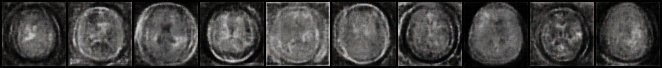

# Generated for non tumor
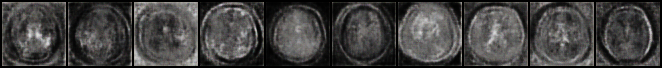